In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from carbonplan_trace.v1.glas_allometric_eq import REALM_GROUPINGS
from carbonplan_trace.v1 import load
import carbonplan_trace.v1.model as m
import pandas as pd
from carbonplan_trace.v1.landsat_preprocess import access_credentials
import numpy as np

import matplotlib.pyplot as plt

In [3]:
access_key_id, secret_access_key = access_credentials()

In [4]:
# we train one model per realm 

realms = list(REALM_GROUPINGS.keys())
# only use australia for example, but we would want all when rerunning this 
# realms = ['australia']

In [5]:
# This block of code is used for generating difference parameter sets for hyperparameter optimization (HPO) of the model 
# the params here are for the xgboost model 

# import itertools

# def product_dict(**kwargs):
#     keys = kwargs.keys()
#     vals = kwargs.values()
#     for instance in itertools.product(*vals):
#         yield dict(zip(keys, instance))


# param_set = {
#     "learning_rate": [0.07, 0.05, 0.03],
#     "max_depth": [10, 12, 14],
#     "colsample_bytree": [0.5, 0.7, 0.9],
#     "subsample": [0.5, 0.7, 0.9],
#     "min_child_weight": [2, 4, 6],
#     "lambda": [1, 1.5, 2],
#     "alpha": [0, 0.5, 1],
#     "gamma": [0, 0.5, 1],
# }

# groupings = [
#     ["learning_rate"],
#     ["max_depth"],
#     ["colsample_bytree", "subsample", "min_child_weight"],
#     ["lambda", "alpha", "gamma"],
# ]

# dims = [list(range(len(param_set[g[0]]))) for g in groupings]
# param_set_list = []
# for orders in list(itertools.product(*dims)):
#     d = {}
#     for o, g in zip(orders, groupings):
#         for k in g:
#             d[k] = param_set[k][o]
#     param_set_list.append(d)

In [6]:
# helper functions for assessing model performances 

def get_all_prediction_result(model, df_train, df_test, df_val):

    df_train["biomass_pred"] = model._predict(df_train)
    df_test["biomass_pred"] = model._predict(df_test)
    df_val["biomass_pred"] = model._predict(df_val)

    return df_train, df_test, df_val


def calculate_temporal_variability(df, y1=2007, y2=2008, precision=3):
    year1 = df.loc[df.year == y1, ["lat", "lon", "biomass"]]
    year2 = df.loc[df.year == y2, ["lat", "lon", "biomass"]]

    year1["lat_round"] = year1.lat.round(precision)
    year1["lon_round"] = year1.lon.round(precision)
    year2["lat_round"] = year2.lat.round(precision)
    year2["lon_round"] = year2.lon.round(precision)

    merged = year1.merge(year2, on=["lat_round", "lon_round"], suffixes=["_year1", "_year2"])

    mae = (merged.biomass_year2 - merged.biomass_year1).abs().mean()
    me = (merged.biomass_year2 - merged.biomass_year1).mean()

    return {"mae": mae, "me": me}


def plot_scatter(sub, title, n=500000):
    xmin = -10
    size = min(len(sub), n)
    toplot = sub.sample(n=size)
    xmax = toplot.biomass.quantile(0.95)
    plt.scatter(toplot.biomass, toplot.biomass_pred, s=1, alpha=0.03)
    plt.plot([xmin, xmax], [xmin, xmax], "k")
    plt.xlabel("True Biomass (Mg/ha)")
    plt.ylabel("Predicted Biomass (Mg/ha)")
    plt.xlim(xmin, xmax)
    plt.ylim(xmin, xmax)
    plt.title(title)

Building model for afrotropic realm
    size of entire df is 0.6Gb
    training sample size = 10238467
    testing sample size = 2559617
    eval sample size = 0
    rf_afrotropic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/rf_afrotropic_all.joblib


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   50.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   49.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 146 tasks      |

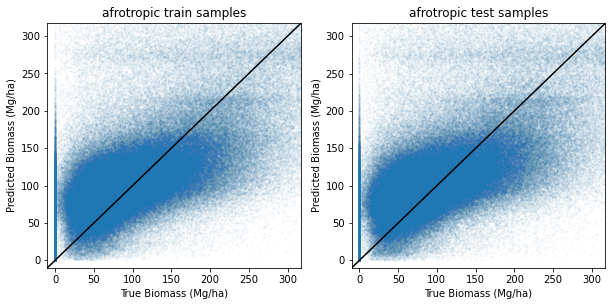

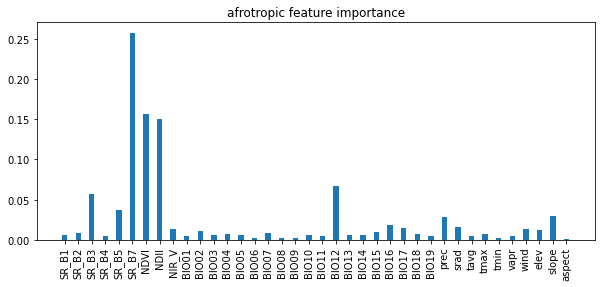

Building model for australia realm
    size of entire df is 0.09Gb
    training sample size = 1458612
    testing sample size = 364654
    eval sample size = 0
    rf_australia_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/rf_australia_all.joblib


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      |

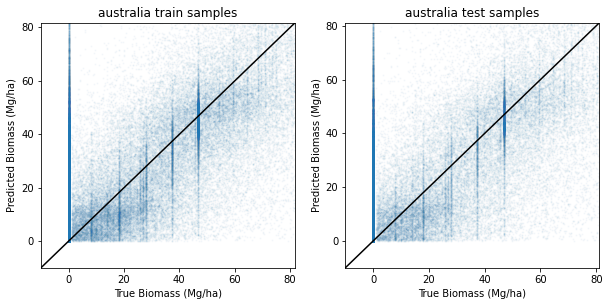

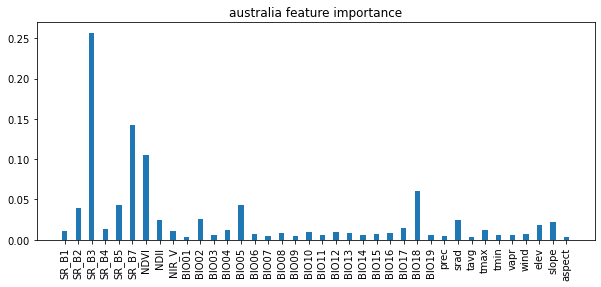

Building model for nearctic realm
    size of entire df is 0.51Gb
    training sample size = 8670950
    testing sample size = 2167738
    eval sample size = 0
    rf_nearctic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/rf_nearctic_all.joblib


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   40.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   54.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    9.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   12.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   41.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   54.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 146 tasks      |

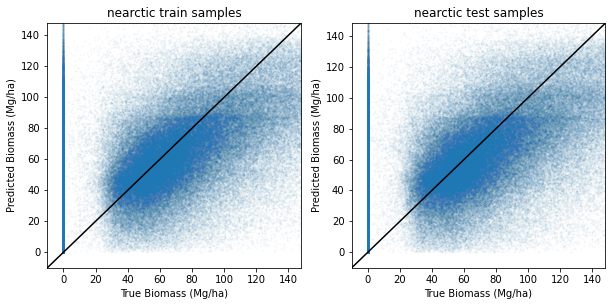

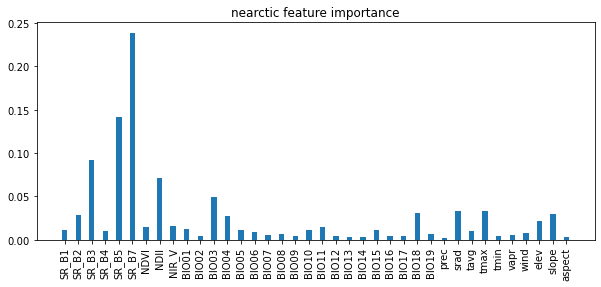

Building model for neotropic realm
    size of entire df is 0.5Gb
    training sample size = 8459645
    testing sample size = 2114912
    eval sample size = 0
    rf_neotropic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/rf_neotropic_all.joblib


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   41.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   55.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   41.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   55.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 146 tasks      |

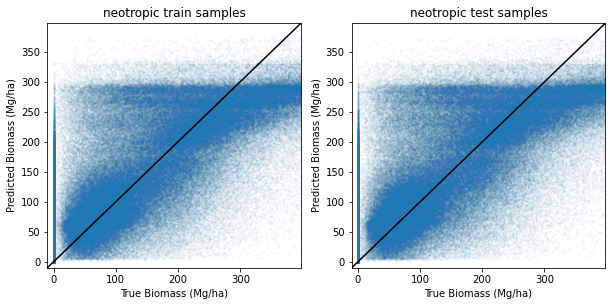

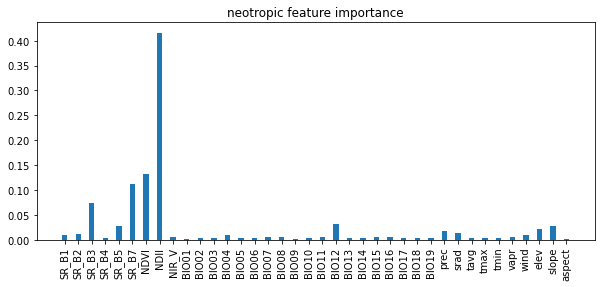

Building model for palearctic realm
    size of entire df is 1.09Gb
    training sample size = 18615187
    testing sample size = 4653797
    eval sample size = 0
    rf_palearctic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/rf_palearctic_all.joblib


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   16.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   20.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   26.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   16.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 146 tasks      |

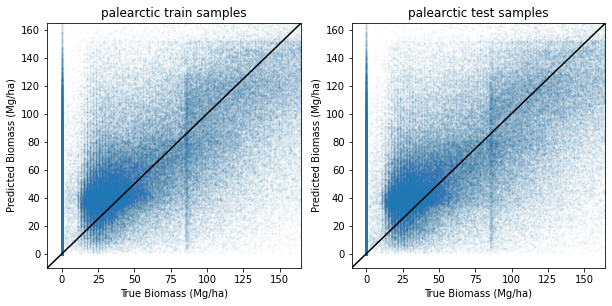

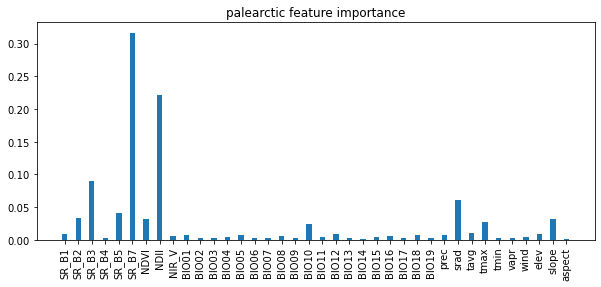

Building model for tropical_asia realm
    size of entire df is 0.2Gb
    training sample size = 3370939
    testing sample size = 842735
    eval sample size = 0
    rf_tropical_asia_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/rf_tropical_asia_all.joblib


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   15.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   20.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   15.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   21.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 146 tasks      |

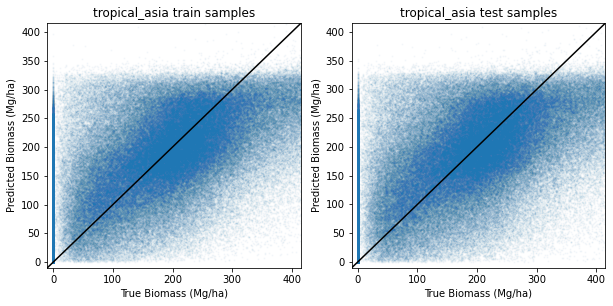

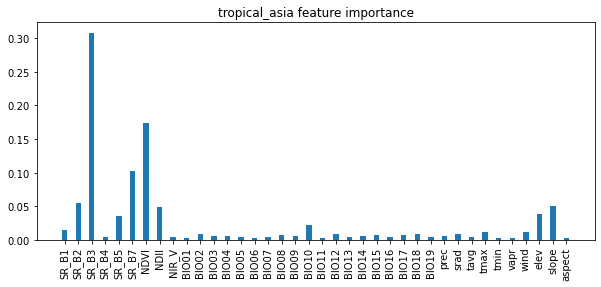

Building model for afrotropic realm
    size of entire df is 0.6Gb
    training sample size = 10238467
    testing sample size = 2559617
    eval sample size = 0
    xgb_afrotropic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/xgb_afrotropic_all.bin


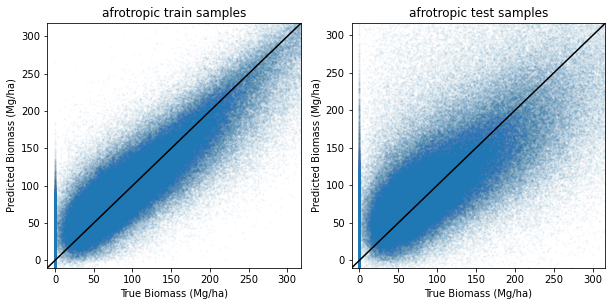

Building model for australia realm
    size of entire df is 0.09Gb
    training sample size = 1458612
    testing sample size = 364654
    eval sample size = 0
    xgb_australia_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/xgb_australia_all.bin


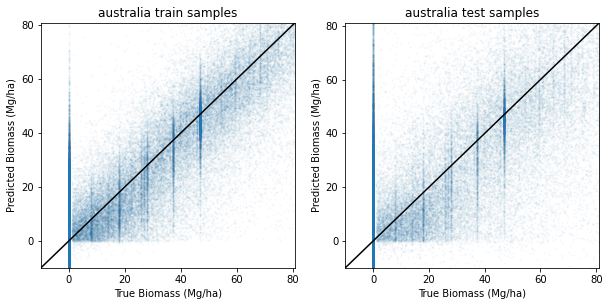

Building model for nearctic realm
    size of entire df is 0.51Gb
    training sample size = 8670950
    testing sample size = 2167738
    eval sample size = 0
    xgb_nearctic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/xgb_nearctic_all.bin


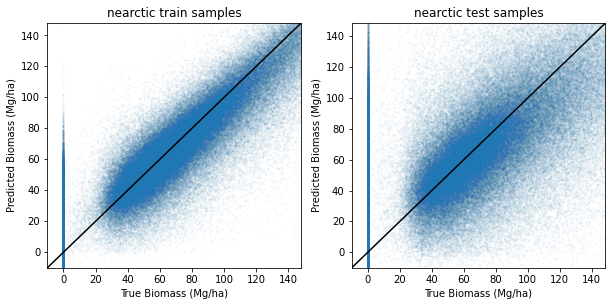

Building model for neotropic realm
    size of entire df is 0.5Gb
    training sample size = 8459645
    testing sample size = 2114912
    eval sample size = 0
    xgb_neotropic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/xgb_neotropic_all.bin


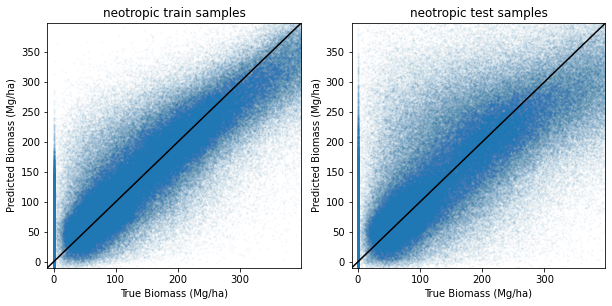

Building model for palearctic realm
    size of entire df is 1.09Gb
    training sample size = 18615187
    testing sample size = 4653797
    eval sample size = 0
    xgb_palearctic_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/xgb_palearctic_all.bin


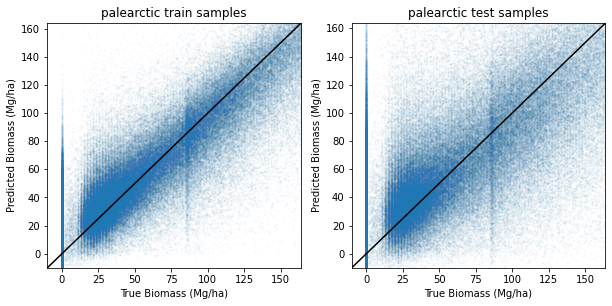

Building model for tropical_asia realm
    size of entire df is 0.2Gb
    training sample size = 3370939
    testing sample size = 842735
    eval sample size = 0
    xgb_tropical_asia_all model already exists, loading from s3://carbonplan-climatetrace/v2/models/xgb_tropical_asia_all.bin


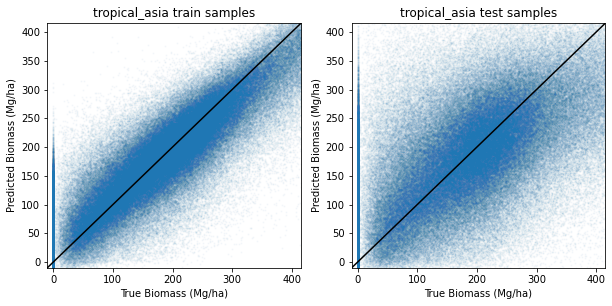

In [9]:
scores = []
# whether to randomly split the train/test data or to split train/test based on year 
# doesn't seem to make too big of a difference on validation performance 
random_split = True
# whether to reload the training data from individual years, or use the compiled data directly 
# only needs to be True when the training data is re-generated 
reload = False
# whether to overwrite the models already trained 
overwrite = False

for model_class in [m.random_forest_model, m.xgb_model]: 
    for realm in realms:
        print(f"Building model for {realm} realm")

        # load data, add year information
        df = load.training(
            realm=realm,
            reload=reload,
            access_key_id=access_key_id,
            secret_access_key=secret_access_key,
        )
        print(f"    size of entire df is {round(df.size / 1e9, 2)}Gb")

        for strategy in ["none"]:  # ["first", "last", "none"]:
            # strategy = "first" means that the first year is used for validation, and "last" means the last year is used for validation 
            # strategy = none means that no data is reserved for validation => used for training the final production model, 
            # whereas first/last allow us to assess model performance during the model design and tuning phases 
            df_train, df_test, df_val = m.train_test_split_based_on_year(
                df, val_strategy=strategy, random_train_test=random_split
            )
            print(f"    training sample size = {len(df_train)}")
            print(f"    testing sample size = {len(df_test)}")
            print(f"    eval sample size = {len(df_val)}")

            # this for loop is for running different parameter sets in HPO 
            for params in [{}]:
                
                # instantiating the model also does .fit 
                # this will load the model if it already exist and overwrite=False, and fit the model if overwrite=True or the model does not exist 
                model = model_class(
                    realm=realm,
                    df_train=df_train,
                    df_test=df_test,
                    output_folder="s3://carbonplan-climatetrace/v2/models/",  # v1 or v2 
                    overwrite=overwrite,
                    validation_year=strategy,
                    params=params,
                )
                
                # do model evaluation on each split of the data: train, test, and validation 
                for split, sub in zip(("train", "test", "val"), (df_train, df_test, df_val)):
                    # validation data can be empty if val strategy = 'none'
                    if len(sub) > 0:
                        model_score = model.evaluate(sub)
                        model_score["model_name"] = model.name
                        model_score["split"] = split
                        model_score["realm"] = realm
                        model_score["validation_year"] = strategy
                        model_score["random_split"] = random_split
                        model_score["sample_size"] = len(sub)
                        model_score.update(params)
                        scores.append(model_score)
                
                df_train["biomass_pred"] = model.predict(df_train)
                df_test["biomass_pred"] = model.predict(df_test)
            
            # plot the prediction result 
            plt.figure(figsize=(10, 4.5))
            plt.subplot(1, 2, 1)
            plot_scatter(df_train, title=f"{realm} train samples")
            plt.subplot(1, 2, 2)
            plot_scatter(df_test, title=f"{realm} test samples")
            plt.savefig(f"{realm}_model_scatter.png")
            plt.show()
            plt.close()
            
            # plotting feature importance if the model being trained is random forest 
            if 'rf' in model.name:
                plt.figure(figsize=(10, 4))
                plt.title(f"{realm} feature importance")
                xticks = np.arange(len(m.features)) * 2
                plt.bar(xticks, model.model.feature_importances_)
                plt.xticks(ticks=xticks, labels=m.features, rotation="vertical")
                plt.savefig(f"{realm}_feature_imp.png")
                plt.show()
                plt.close()
            # TODO: plot something else if we're training the xgboost model 

scores = pd.DataFrame(scores)

In [8]:
scores

# only selecting everything that's test or val split 
# scores.loc[scores.split == 'val]

# doing weighted average of the scores 
# (scores.loc[scores.split == 'test'].r2 * scores.loc[scores.split == 'test'].sample_size).sum() / scores.loc[scores.split == 'test'].sample_size.sum()

,bias,mae,r2,model_name,split,realm,validation_year,random_split,sample_size
0,-0.004100,42.039875,0.635130,rf_afrotropic_all,train,afrotropic,none,True,10238467
1,0.017196,42.513719,0.625274,rf_afrotropic_all,test,afrotropic,none,True,2559617
2,0.006414,5.544415,0.801728,rf_australia_all,train,australia,none,True,1458612
3,0.012535,6.037709,0.756814,rf_australia_all,test,australia,none,True,364654
4,0.004737,21.186376,0.567468,rf_nearctic_all,train,nearctic,none,True,8670950
5,0.004061,21.502960,0.542519,rf_nearctic_all,test,nearctic,none,True,2167738
6,0.002866,55.737171,0.630334,rf_neotropic_all,train,neotropic,none,True,8459645
7,-0.022210,56.293290,0.622597,rf_neotropic_all,test,neotropic,none,True,2114912
8,-0.001780,18.295647,0.639162,rf_palearctic_all,train,palearctic,none,True,18615187
9,0.020831,18.471284,0.631362,rf_palearctic_all,test,palearctic,none,True,4653797


In [ ]:
for random_split in [True, False]:
    print(random_split)
    sub = scores.loc[(scores.split == "val") & (scores.random_split == random_split)]
    print(f"validation score = {(sub.r2 * sub.sample_size).sum() / sub.sample_size.sum()}")
    sub = scores.loc[(scores.split == "test") & (scores.random_split == random_split)]
    print(f"testing score    = {(sub.r2 * sub.sample_size).sum() / sub.sample_size.sum()}")
    sub = scores.loc[(scores.split == "train") & (scores.random_split == random_split)]
    print(f"training score   = {(sub.r2 * sub.sample_size).sum() / sub.sample_size.sum()}")

In [ ]:
for validation_year in ["first", "last"]:
    print(validation_year)
    sub = scores.loc[(scores.split == "val") & (scores.validation_year == validation_year)]
    print(f"validation score = {(sub.r2 * sub.sample_size).sum() / sub.sample_size.sum()}")
    sub = scores.loc[(scores.split == "test") & (scores.validation_year == validation_year)]
    print(f"testing score    = {(sub.r2 * sub.sample_size).sum() / sub.sample_size.sum()}")
    sub = scores.loc[(scores.split == "train") & (scores.validation_year == validation_year)]
    print(f"training score   = {(sub.r2 * sub.sample_size).sum() / sub.sample_size.sum()}")